<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_14/03_kmeans_assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

plt.style.use("seaborn")

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>

### Data
- [Dog & Horse](https://github.com/gumdropsteve/datasets/blob/master/dog_or_horse.csv)
- [Seattle Rain](https://github.com/gumdropsteve/datasets/blob/master/seattle_weather_1948-2017.csv)


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [ ]:
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
60,30.0,80.0,0.0,dog
78,34.0,80.0,0.0,dog
108,47.0,95.0,1.0,horse


In [ ]:
# Scale Data (Height and Weight)
sc_dog_horse = StandardScaler()
scaled_dh = sc_dog_horse.fit_transform(df_dh[["height", "weight"]])

# Make DataFrame from Scaled Data
df_dh_scaled = pd.DataFrame(scaled_dh, columns=["height_scaled", "weight_scaled"])

# Concat scaled dataframe with target and type
df_dh_scaled = pd.concat([df_dh_scaled, df_dh], axis=1)

df_dh_scaled.sample(3)

,height_scaled,weight_scaled,height,weight,target,type
185,0.409380,-0.125324,55.0,102.0,1.0,horse
109,1.988104,1.690965,84.0,172.0,1.0,horse
136,0.028308,0.160093,48.0,113.0,1.0,horse


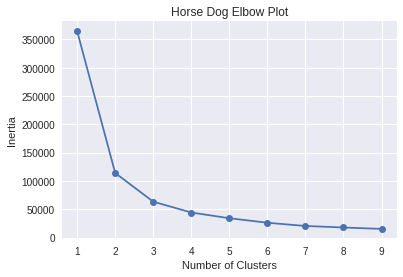

In [ ]:
# Elbow Plot to Help Determine Amount of Clusters if you dont know how many exist

inertia_ls = [] # save inertia values
for k in range(1,10): # test different n_clusters between 1-10
    kmeans = KMeans(n_clusters=int(k)).fit(df_dh_scaled[["height", "weight"]]) # apply KMeans
    inertia_ls.append(kmeans.inertia_) # Append inertia to list

# Plot Elbow
plt.plot(list(range(1,10)), inertia_ls, marker="o")
plt.title("Horse Dog Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

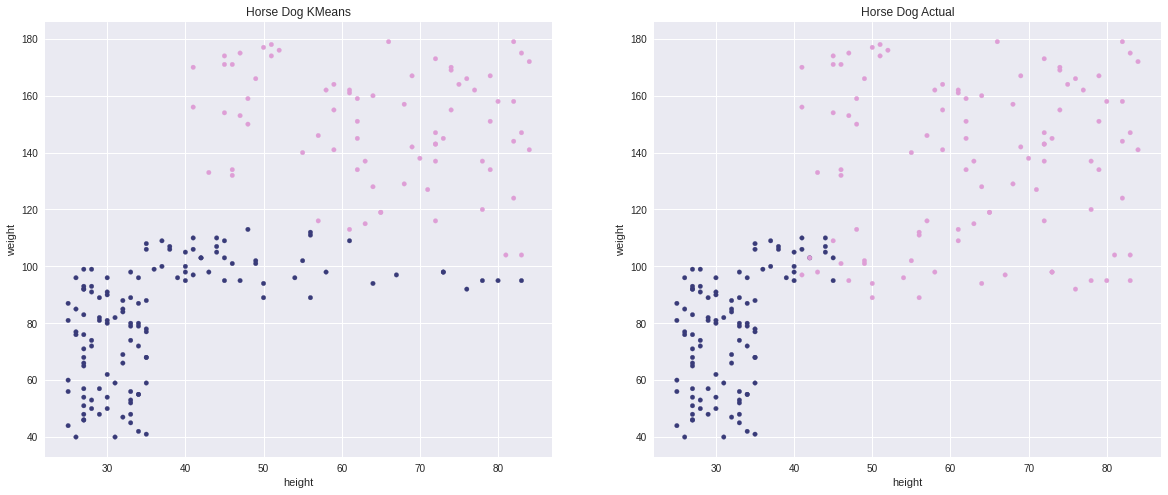

In [ ]:
# Apply KMeans
kmeans_dog_horse = KMeans(n_clusters=2).fit(df_dh_scaled[["height", "weight"]])
df_dh_scaled["label"] = kmeans_dog_horse.labels_

fig, ax = plt.subplots(1,2)

df_dh_scaled.plot(
    kind="scatter", 
    x="height", 
    y="weight", 
    c=df_dh_scaled["label"], 
    cmap="tab20b",
    title="Horse Dog KMeans",
    ax = ax[0],
    colorbar=False
    )

df_dh_scaled.plot(
    kind="scatter", 
    x="height", 
    y="weight", 
    c=df_dh_scaled["target"], 
    cmap="tab20b",
    title="Horse Dog Actual",
    ax = ax[1],
    figsize=(20,8),
    colorbar=False
    );

In [ ]:
# Accuracy of KMeans Clustering
accuracy_score(df_dh_scaled["target"], df_dh_scaled["label"])

0.87

#### Seattle Weather KMeans Challenge

In [ ]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv").dropna()
print(df_sea.shape)
df_sea.sample(3)

(25548, 5)


,ds,prcp,tmax,tmin,rain
14673,1988-03-04,0.14,49,40,True
20371,2003-10-10,0.00,59,47,False
7396,1968-04-01,0.01,55,44,True


In [ ]:
# Scale Data (Height and Weight)
sc_sea = StandardScaler()
scaled_sea = sc_sea.fit_transform(df_sea[["prcp", "tmax", "tmin"]])
print(scaled_sea.shape)

# Make DataFrame from Scaled Data
df_sea_scaled = pd.DataFrame(scaled_sea, columns=["prcp_scaled", "tmax_scaled", "tmin_scaled"])


# Concat scaled dataframe with target and type
df_sea_scaled = pd.concat([df_sea_scaled, df_sea], axis=1).dropna()

print(df_sea.shape)
print(df_sea_scaled.shape)
df_sea_scaled.sample(3)

(25548, 3)
(25548, 5)
(25545, 8)


,prcp_scaled,tmax_scaled,tmin_scaled,ds,prcp,tmax,tmin,rain
5986,-0.235211,-0.120806,-0.395080,1964-05-22,0.05,58.0,41.0,True
2130,2.023951,-0.355676,0.841869,1953-10-31,0.59,55.0,52.0,True
22708,-0.193374,-0.590546,-0.844880,2010-03-04,0.05,53.0,42.0,True


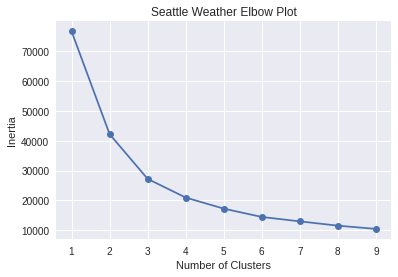

In [ ]:
inertia_ls = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=int(k)).fit(df_sea_scaled[["prcp_scaled", "tmax_scaled", "tmin_scaled"]])
    inertia_ls.append(kmeans.inertia_)

plt.plot(list(range(1,10)), inertia_ls, marker="o")
plt.title("Seattle Weather Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

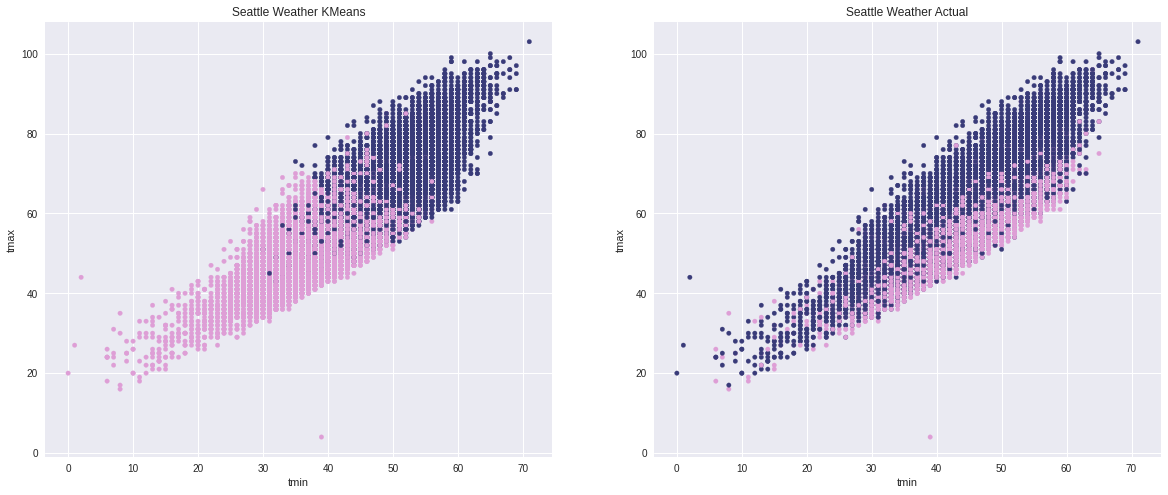

In [ ]:
# Apply KMeans
kmeans_sea = KMeans(n_clusters=2).fit(df_sea_scaled[["prcp_scaled", "tmax_scaled", "tmin_scaled"]].dropna())
df_sea_scaled["label"] = kmeans_sea.labels_

fig, ax = plt.subplots(1,2)

df_sea_scaled.dropna().plot(
    kind="scatter", 
    x="tmin", 
    y="tmax", 
    c=df_sea_scaled["label"], 
    cmap="tab20b",
    title="Seattle Weather KMeans",
    ax = ax[0],
    colorbar=False
    )

df_sea_scaled.plot(
    kind="scatter", 
    x="tmin", 
    y="tmax", 
    c=df_sea_scaled["rain"], 
    cmap="tab20b",
    title="Seattle Weather Actual",
    ax = ax[1],
    figsize=(20,8),
    colorbar=False
    );

In [ ]:
accuracy_score(df_sea_scaled["rain"].astype("int"), df_sea_scaled["label"])

0.6586416128400862

#### Random Blob KMeans Challenge

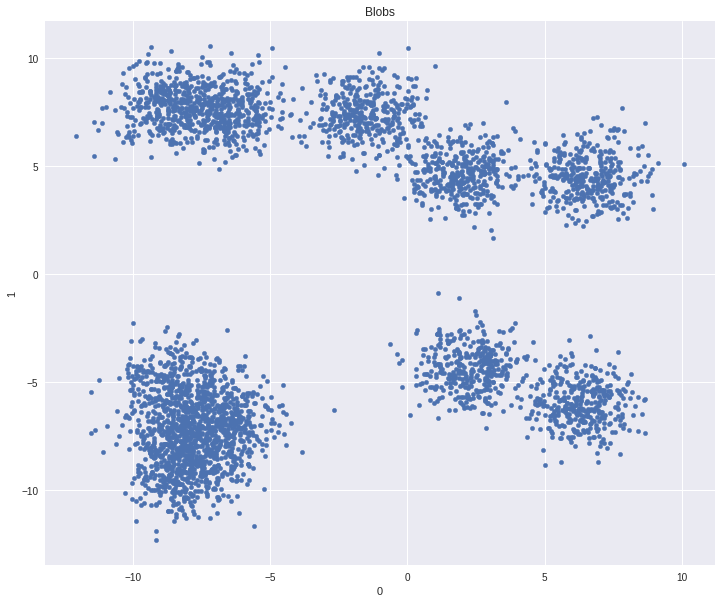

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,20))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Scale Data (x and y axis)
sc_blob = StandardScaler()
scaled_blob = sc_blob.fit_transform(df_blob)

# Make DataFrame from Scaled Data
df_blob_scaled = pd.DataFrame(scaled_blob, columns=["x_scaled", "y_scaled"])


# Concat scaled dataframe with target and type
df_blob_scaled = pd.concat([df_blob_scaled, df_blob], axis=1).dropna()

df_blob_scaled.sample(3)

,x_scaled,y_scaled,0,1
2053,-0.478990,-0.989116,-5.642658,-7.308899
821,-0.370583,1.284426,-5.005529,7.964464
838,-0.716087,1.196147,-7.036124,7.371420


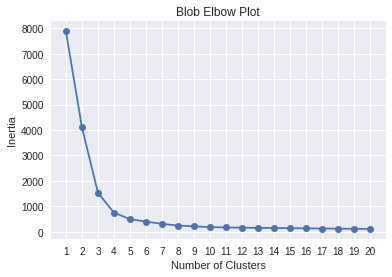

In [ ]:
inertia_ls = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=int(k)).fit(df_blob_scaled[["x_scaled", "y_scaled"]])
    inertia_ls.append(kmeans.inertia_)

plt.plot(list(range(1,21)), inertia_ls, marker="o")
plt.title("Blob Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(list(range(1,21)));

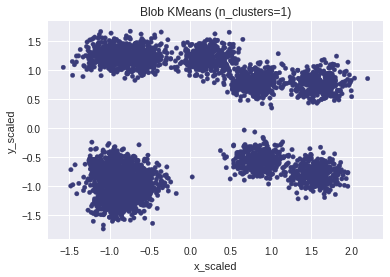

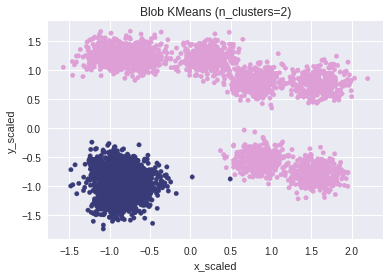

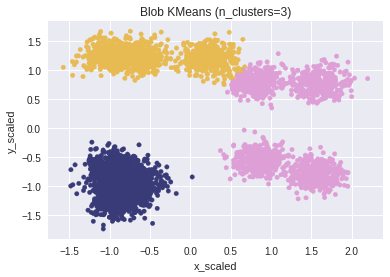

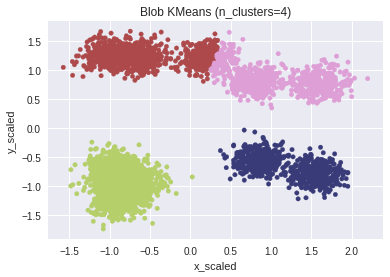

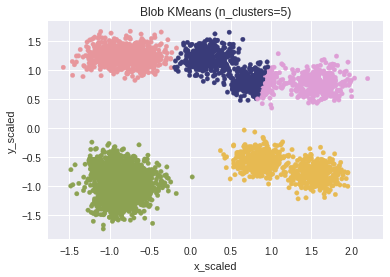

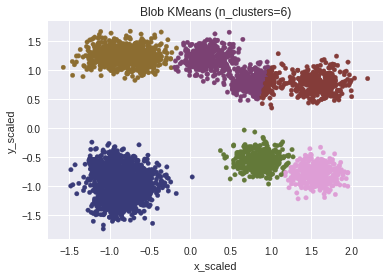

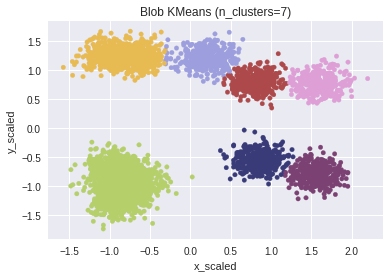

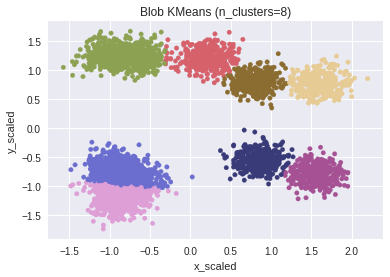

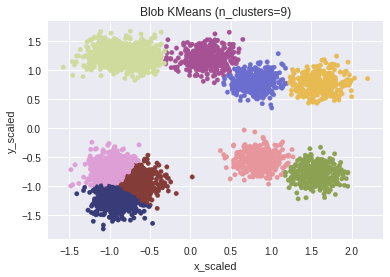

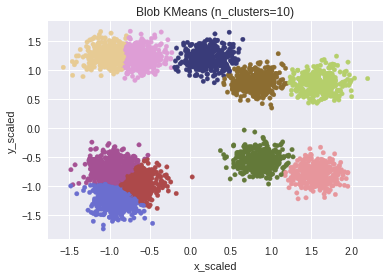

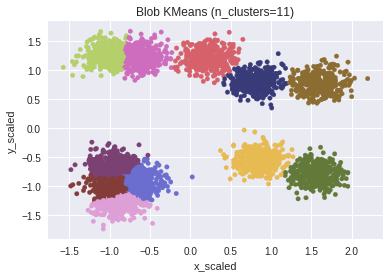

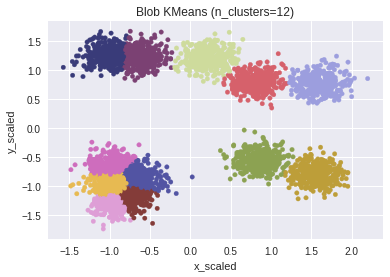

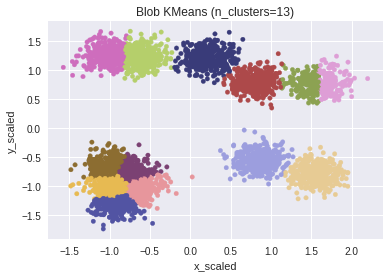

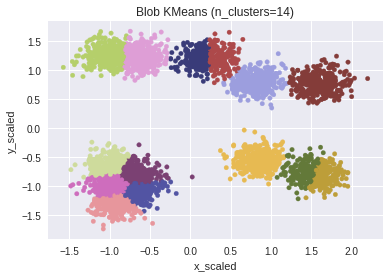

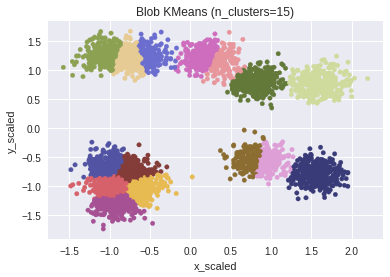

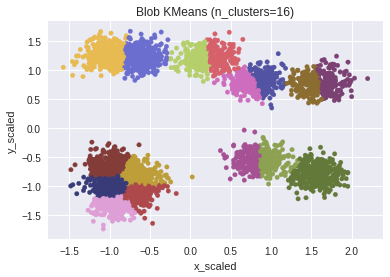

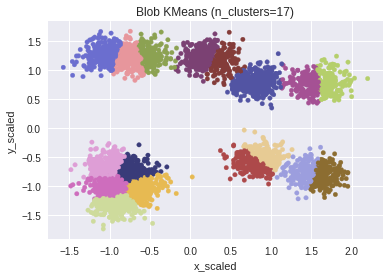

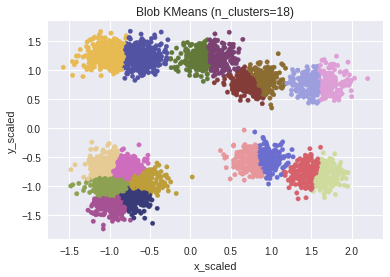

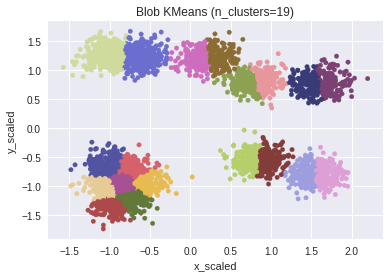

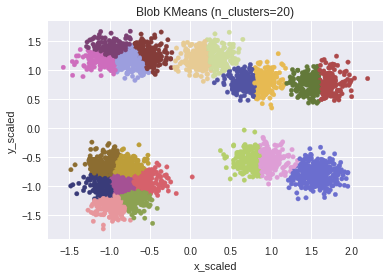

In [ ]:
# Apply KMeans
kmeans_blob = KMeans(n_clusters=2).fit(df_blob_scaled[["x_scaled", "y_scaled"]])
df_blob_scaled["label"] = kmeans_blob.labels_

for x in range(1,21):

    kmeans_blob = KMeans(n_clusters=x).fit(df_blob_scaled[["x_scaled", "y_scaled"]])
    df_blob_scaled["label"] = kmeans_blob.labels_

    df_blob_scaled.plot(
        kind="scatter", 
        x="x_scaled", 
        y="y_scaled", 
        c=df_blob_scaled["label"], 
        cmap="tab20b",
        title=f"Blob KMeans (n_clusters={x})",
        colorbar=False
        );